In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
train=pd.read_csv('titanic.csv')
train

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [61]:
train.isnull()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
train.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

<Axes: >

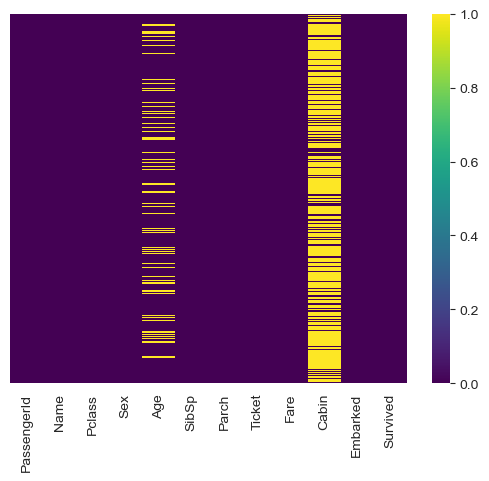

In [63]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

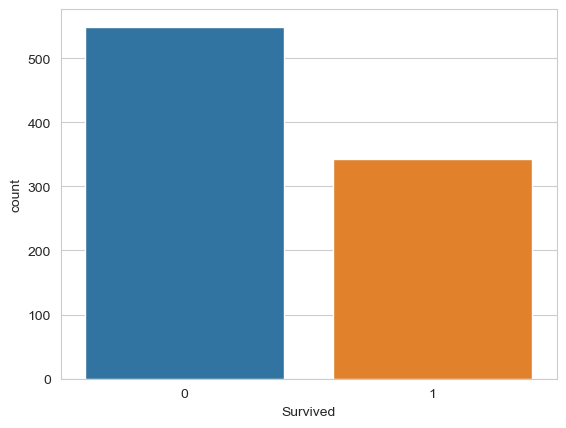

In [64]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=train)

<Axes: xlabel='Survived', ylabel='count'>

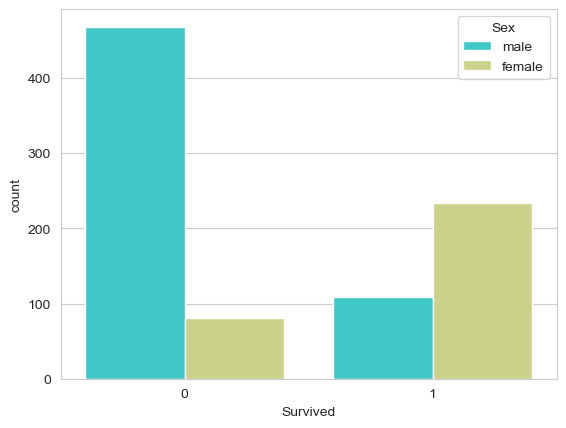

In [65]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Sex",data=train,palette="rainbow")

C:\Users\apasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


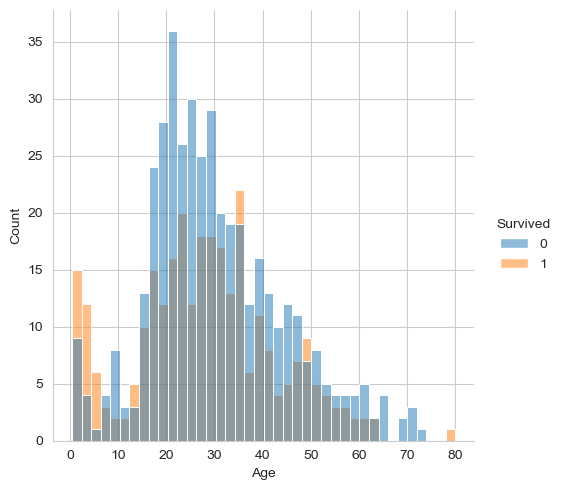

In [66]:
sns.displot(data=train,x='Age',hue='Survived',color='darkred',bins=40)

<Axes: >

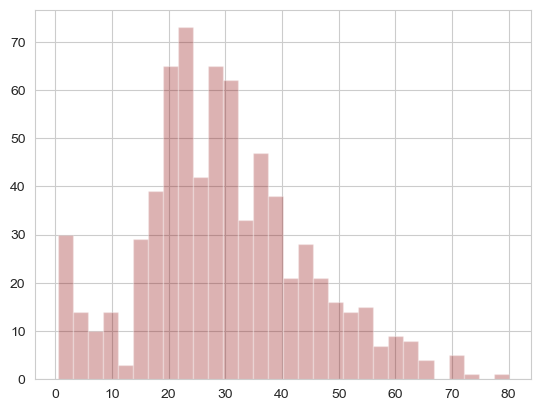

In [67]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

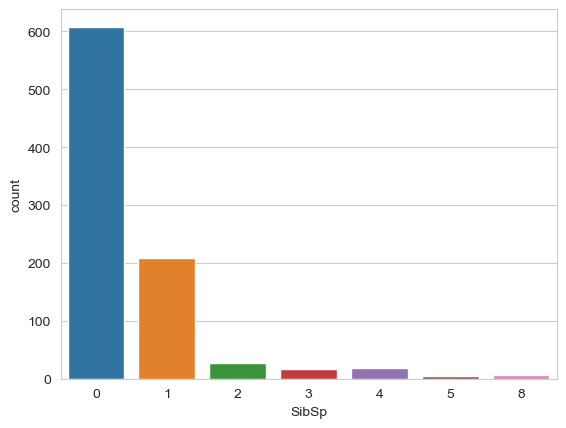

In [68]:
sns.countplot(data=train,x='SibSp')

<Axes: >

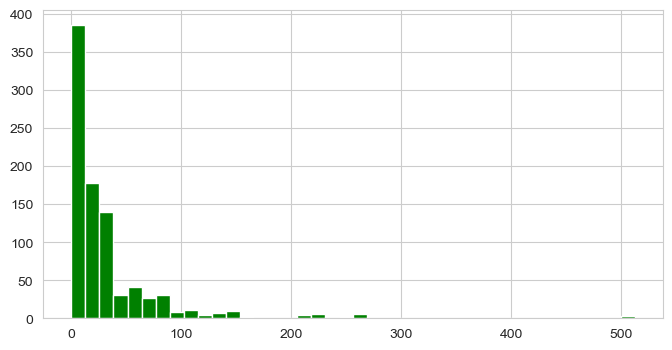

In [69]:
train['Fare'].hist(bins=40,color='green',figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

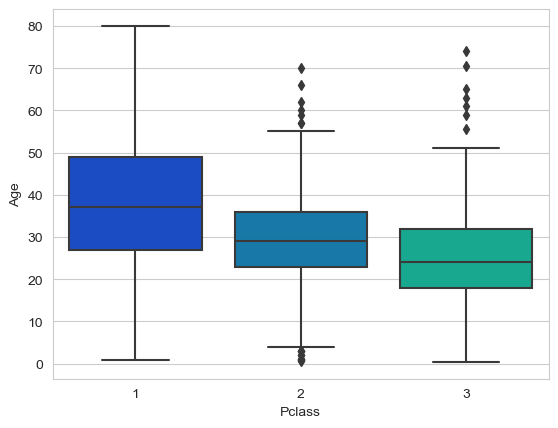

In [70]:
sns.boxplot(x='Pclass',y='Age',data=train,palette="winter")

In [71]:
def impute_Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [72]:
train['Age']=train[['Age','Pclass']].apply(impute_Age,axis=1)

C:\Users\apasi\AppData\Local\Temp\ipykernel_23432\2677949733.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\apasi\AppData\Local\Temp\ipykernel_23432\2677949733.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

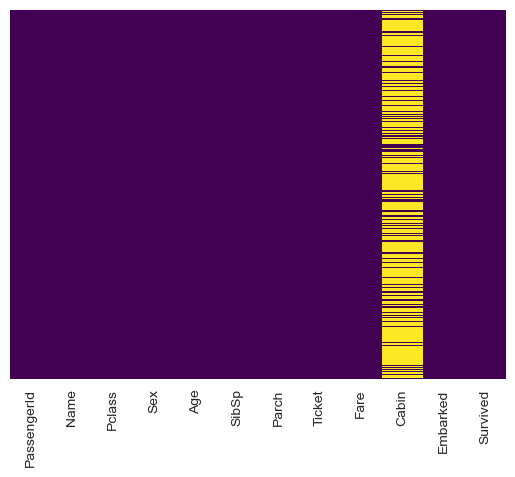

In [73]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [74]:
train.drop("Cabin",axis=1,inplace=True)

In [75]:
train.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,S,0


In [76]:
train.isnull().sum()

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Survived       0
dtype: int64

In [77]:
train["Embarked"].unique

<bound method Series.unique of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [78]:
train["Embarked"]=train["Embarked"].fillna("S")

In [79]:
train

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,24.0,1,2,W./C. 6607,23.4500,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C,1


In [81]:
train['Sex']=train['Sex'].map({'male':0, 'female':1})

In [83]:
train.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,1,0,113803,53.1000,S,1
4,5,"Allen, Mr. William Henry",3,0,35.0,0,0,373450,8.0500,S,0


In [84]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()

In [87]:
train['Embarked']=le.fit_transform(train['Embarked'])

In [88]:
train

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,0,22.0,1,0,A/5 21171,7.2500,2,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,1,0,PC 17599,71.2833,0,1
2,3,"Heikkinen, Miss. Laina",3,1,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,1,0,113803,53.1000,2,1
4,5,"Allen, Mr. William Henry",3,0,35.0,0,0,373450,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,0,27.0,0,0,211536,13.0000,2,0
887,888,"Graham, Miss. Margaret Edith",1,1,19.0,0,0,112053,30.0000,2,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,1,24.0,1,2,W./C. 6607,23.4500,2,0
889,890,"Behr, Mr. Karl Howell",1,0,26.0,0,0,111369,30.0000,0,1


In [90]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [91]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,0,22.0,1,0,7.2500,2,0
1,2,1,1,38.0,1,0,71.2833,0,1
2,3,3,1,26.0,0,0,7.9250,2,1
3,4,1,1,35.0,1,0,53.1000,2,1
4,5,3,0,35.0,0,0,8.0500,2,0


In [94]:
x=train.drop(['Survived'],axis=1)

In [97]:
y=train['Survived']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
model=LogisticRegression()

In [103]:
model.fit(x_train,y_train)

C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
predictions=model.predict(x_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[134,  20],
       [ 40,  74]], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
score=accuracy_score(y_test,predictions)

In [110]:
score

0.7761194029850746